In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Features = R & D Spending, Administration, Marketing Spend, state 
# Target = Profit

In [3]:
# Uploading the dataset
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
df.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
# Checking the correlation between the features and the target variable
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

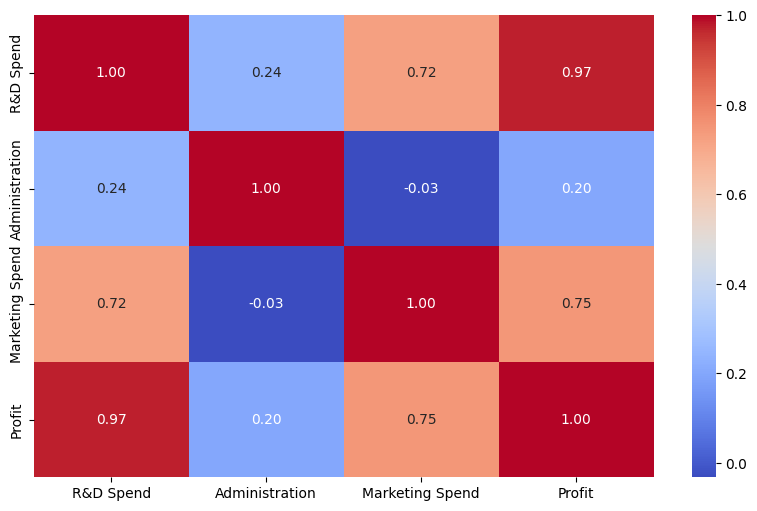

In [12]:
# Plot the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

C:\Users\yop\AppData\Local\Temp\ipykernel_6916\404836394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Profit", y="State", data=df, orient='h', palette='Set2')


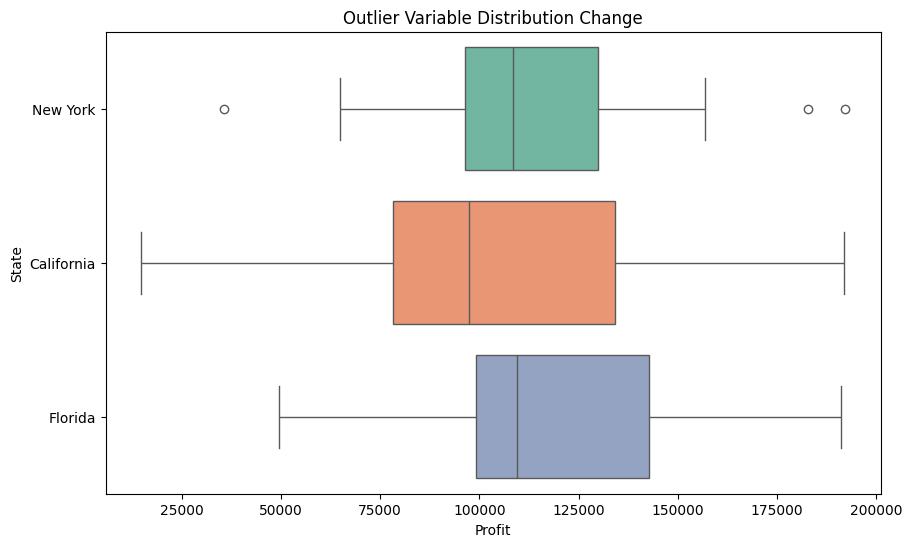

In [28]:
# Checking the outliers of the Profit column
plt.figure(figsize=(10, 6))
sns.boxplot(x="Profit", y="State", data=df, orient='h', palette='Set2')
plt.title('Outlier Variable Distribution Change')
plt.show()


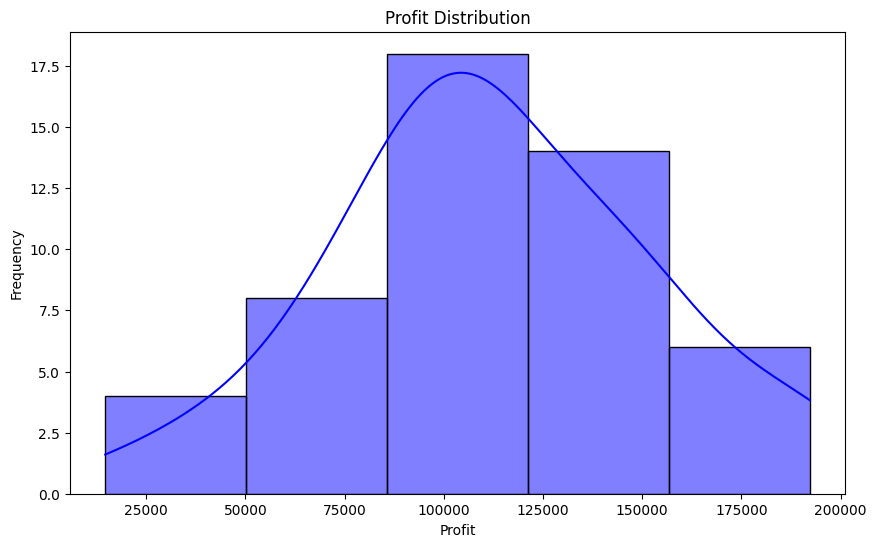

In [30]:
# histogram of the Profit column
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=5, kde=True, color='blue')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

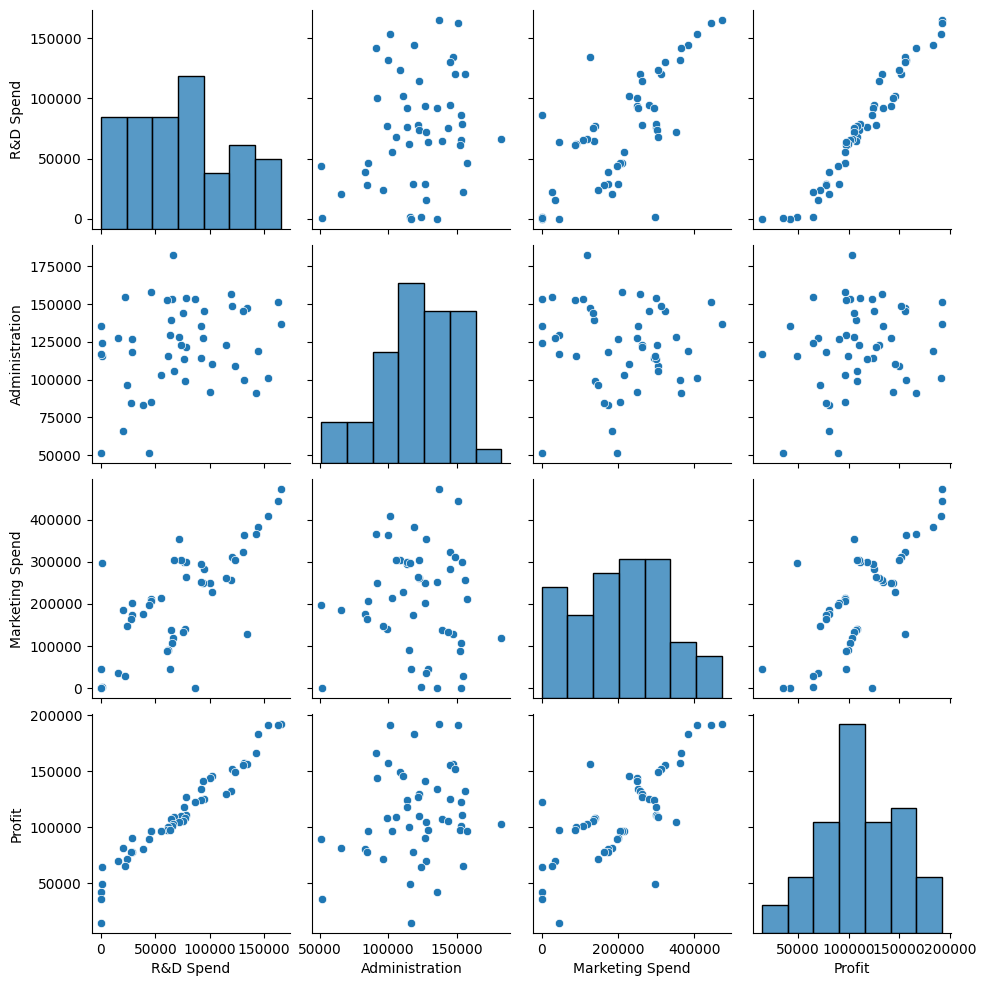

In [31]:
sns.pairplot(df)

In [32]:
# Preparing the data for modeling
X = df.drop(['Profit'], axis=1)
y = df['Profit']



In [50]:
# Preparing the data for modeling
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

# changing the categorical variable into numpy array
x = x.to_numpy()
y = y.to_numpy()

# reshaping the data
x = x.reshape(-1, 1)

In [51]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encoding the 'State' column in x_train and x_test
column_transformer = ColumnTransformer(
	transformers=[
		('encoder', OneHotEncoder(), ['State'])
	],
	remainder='passthrough'
)

x_train_encoded = column_transformer.fit_transform(x_train)
x_test_encoded = column_transformer.transform(x_test)

# Fitting the model with the encoded data
model.fit(x_train_encoded, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(x_test_encoded)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(10)

,Actual,Predicted
0,134307.35,126362.879083
1,81005.76,84608.453836
2,99937.59,99677.494252
3,64926.08,46357.460686
4,125370.37,128750.482885
5,35673.41,50912.417419
6,105733.54,109741.350327
7,107404.34,100643.242816
8,97427.84,97599.275746
9,122776.86,113097.425244


In [56]:
testing_data_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
testing_data_model.head(10)

training_data_model = pd.DataFrame({'Actual': y_train, 'Predicted': model.predict(x_train_encoded)})
training_data_model.head(10)

,Actual,Predicted
0,141585.52,129287.259323
1,166187.94,174098.252026
2,89949.14,91886.858226
3,152211.77,150220.996590
4,182901.99,173623.190356
5,156122.51,156165.844899
6,77798.83,76521.478937
7,49490.75,56930.338706
8,42559.73,44712.308564
9,129917.04,145679.583113


In [57]:
# Evaluation of the model on the test dataset
# R squared score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R squared score: {r2:.2f}')

R squared score: 0.90


In [58]:
# MS Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 82010363.05


In [59]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 6961.48


In [61]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 9055.96


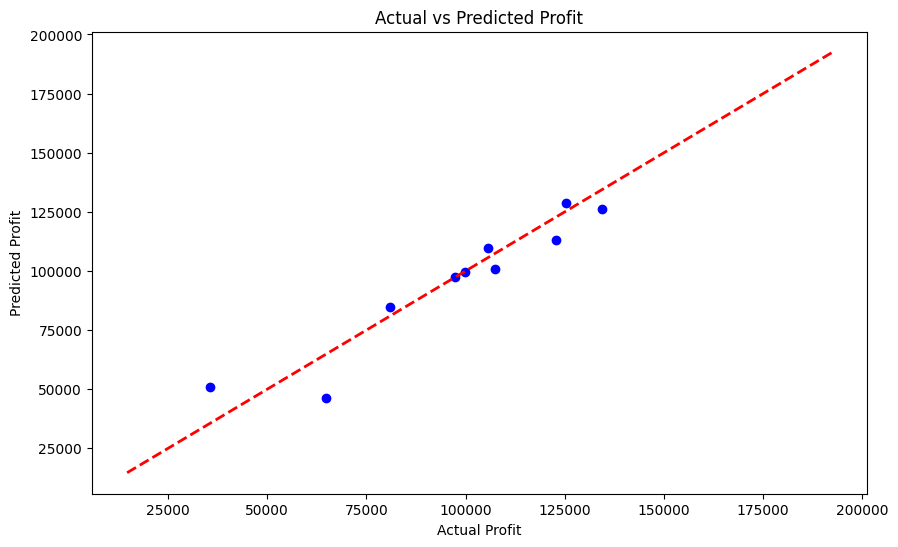

In [62]:
    # Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.show()